In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from numpy import NaN as NA
import re
import seaborn as sns
from operator import itemgetter, attrgetter

%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [39]:
df1 = pd.read_csv('kaggle_Ecommerce.csv', parse_dates=['InvoiceDate'])
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [40]:
# Quantity가 음수일 경우 제외시킨다. (반품, 할인 등과 같은 )

# 우리는 수익이 목표가 아니라 매출이 목표이다.

df1 = df1[df1['Quantity']>=0]

In [41]:
df = df1[['InvoiceDate','CustomerID','Sales']]

df['CustomerID']= df['CustomerID'].astype(str)

df

<ipython-input-41-80a7a4decc57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID']= df['CustomerID'].astype(str)


,InvoiceDate,CustomerID,Sales
0,2010-12-01 08:26:00,17850.0,15.30
1,2010-12-01 08:26:00,17850.0,20.34
2,2010-12-01 08:26:00,17850.0,22.00
3,2010-12-01 08:26:00,17850.0,20.34
4,2010-12-01 08:26:00,17850.0,20.34
...,...,...,...
541904,2011-12-09 12:50:00,12680.0,10.20
541905,2011-12-09 12:50:00,12680.0,12.60
541906,2011-12-09 12:50:00,12680.0,16.60
541907,2011-12-09 12:50:00,12680.0,16.60


In [42]:
df.columns = ['주문날짜','고객아이디','매출']

df['주문날짜'] = pd.to_datetime(df['주문날짜'].dt.strftime('%Y-%m-%d'))

df


<ipython-input-42-543338c4dc84>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['주문날짜'] = pd.to_datetime(df['주문날짜'].dt.strftime('%Y-%m-%d'))


,주문날짜,고객아이디,매출
0,2010-12-01,17850.0,15.30
1,2010-12-01,17850.0,20.34
2,2010-12-01,17850.0,22.00
3,2010-12-01,17850.0,20.34
4,2010-12-01,17850.0,20.34
...,...,...,...
541904,2011-12-09,12680.0,10.20
541905,2011-12-09,12680.0,12.60
541906,2011-12-09,12680.0,16.60
541907,2011-12-09,12680.0,16.60


### 월별 구매건수 / 구매금액(합산) 이중 그래프 

1. 월별 그룹바이 후 고객아이디 카운트 = 구매건수
2. 월별 그룹바이 후 매출 sum


In [43]:
df_2 = pd.DataFrame(df.groupby('주문날짜').count()['고객아이디']) # 구매 건수

df_2['매출'] = df.groupby('주문날짜').sum()['매출']

df_2.columns = ['구매건수','매출']

df_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 305 entries, 2010-12-01 to 2011-12-09
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구매건수    305 non-null    int64  
 1   매출      305 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.1 KB


In [44]:
df3 = df_2.resample('M').sum()

df3

,구매건수,매출
주문날짜,,
2010-12-31,41683,823746.140
2011-01-31,34350,691364.560
2011-02-28,27184,523631.890
2011-03-31,35915,717639.360
2011-04-30,29171,537808.621
2011-05-31,36292,770536.020
2011-06-30,36056,761739.900
2011-07-31,38716,719221.191
2011-08-31,34566,737014.260


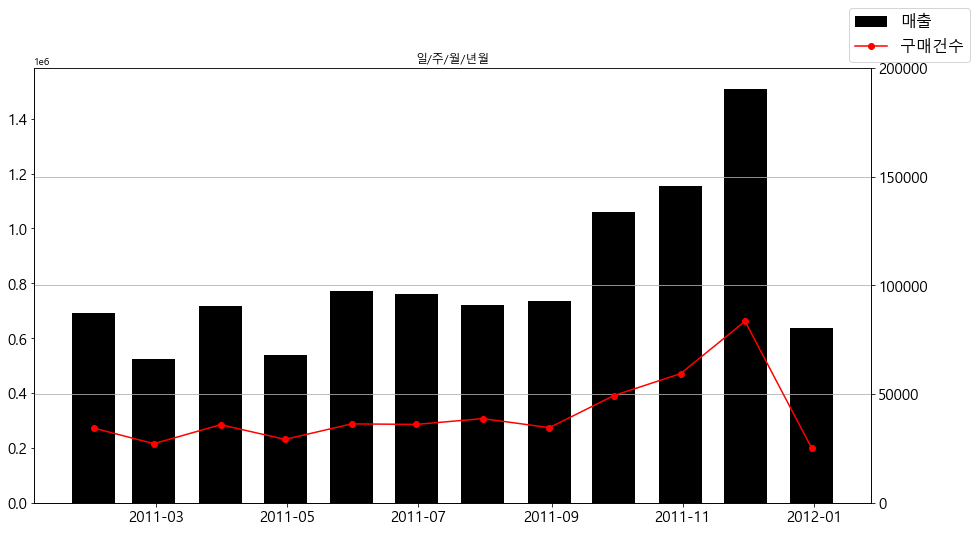

In [48]:
plt.rcParams["figure.figsize"] = (15,8)
fig, ax1 = plt.subplots(1,1)
plt.xticks(fontsize=15)

# dfs3[i]의 i를 바꾸면서 그림가능
ax1.bar(dfs3[1].index, dfs3[1]['매출'], color='k',label='매출', width=20) 
ax1.tick_params(axis = 'y', labelsize =15)
ax2 = ax1.twinx()
ax2.plot(dfs3[1].index, dfs3[1]['구매건수'],color='red',label='구매건수', marker='o')
ax2.set_yticks([i*50000 for i in range(5)])
ax2.tick_params(axis = 'y', labelsize =15)


plt.rc('legend', fontsize=16)
plt.grid(True, axis='y')
plt.title('일/주/월/년월')
fig.legend()
plt.show()

### 누적 구매횟수별 분석

- 한 사람당(고객) 얼마나 몇개 씩 구매했는가? 


ㅇ

In [51]:
df

,주문날짜,고객아이디,매출
0,2010-12-01,17850.0,15.30
1,2010-12-01,17850.0,20.34
2,2010-12-01,17850.0,22.00
3,2010-12-01,17850.0,20.34
4,2010-12-01,17850.0,20.34
...,...,...,...
541904,2011-12-09,12680.0,10.20
541905,2011-12-09,12680.0,12.60
541906,2011-12-09,12680.0,16.60
541907,2011-12-09,12680.0,16.60


In [63]:
# 고객 아이디가 없다면 제외

df2 = df[df['고객아이디']!='nan']


In [67]:
df_user = pd.DataFrame(df2.groupby(['고객아이디']).count()['매출']) # 고객별 구매횟수

df_user['호호미'] = df2.groupby(['고객아이디']).sum()['매출'] # 고객별 매출합

df_user.columns = ['유저별 총 구매횟수','매출']

df_user

,유저별 총 구매횟수,매출
고객아이디,,
12346.0,1,77183.60
12347.0,182,4310.00
12348.0,31,1797.24
12349.0,73,1757.55
12350.0,17,334.40
...,...,...
18280.0,10,180.60
18281.0,7,80.82
18282.0,12,178.05


In [73]:
# 원본 데이터랑 합치기

df_user_final = pd.merge(df,df_user, on=['고객아이디']) # 고객아이디명이 키 값

df_user_final.drop(['매출_y'],axis=1,inplace=True) # 필요없는 매출_y 컬럼은 삭제

df_user_final['주문년도/월'] = df_user_final['주문날짜'].dt.strftime('%Y-%m') # 주문날짜(년-월)컬럼생성

df_user_final['주문년도/월'] = pd.to_datetime(df_user_final['주문년도/월']) # 형 변 환

df_user_final

,주문날짜,고객아이디,매출_x,유저별 총 구매횟수,주문년도/월
0,2010-12-01,17850.0,15.30,297,2010-12-01
1,2010-12-01,17850.0,20.34,297,2010-12-01
2,2010-12-01,17850.0,22.00,297,2010-12-01
3,2010-12-01,17850.0,20.34,297,2010-12-01
4,2010-12-01,17850.0,20.34,297,2010-12-01
...,...,...,...,...,...
397919,2011-12-09,12713.0,15.00,38,2011-12-01
397920,2011-12-09,12713.0,10.20,38,2011-12-01
397921,2011-12-09,12713.0,10.20,38,2011-12-01
397922,2011-12-09,12713.0,24.96,38,2011-12-01


In [74]:
df_user2 = pd.DataFrame(df_user_final.groupby(['주문년도/월','유저별 총 구매횟수']).sum()['매출_x'])

df_user3 = df_user2.unstack().T

df_user3 = df_user3.fillna(0) # 결측치 0 대입

df_user3

주문년도/월           2010-12-01  2011-01-01  2011-02-01  2011-03-01  2011-04-01  \
     유저별 총 구매횟수                                                               
매출_x 1              1361.79    78214.42     1003.97      398.60      303.55   
     2              3228.56      789.00     3937.32     1744.42     2272.98   
     3              1561.05      784.40      225.58     1729.47      315.60   
     4              4737.13     2656.96      741.94     1167.29      232.90   
     5              1177.90     2341.50     1870.25     4079.14     1621.17   
...                     ...         ...         ...         ...         ...   
     2700           1246.66     1499.17     1177.40     1277.61      905.53   
     4596           4228.13      418.77      389.64     1179.37     1100.37   
     5111              0.00        0.00        0.00        0.00        0.00   
     5677           7737.94     5129.47     1471.19    10452.18     4572.32   
     7847           2473.07     1953.78     1017.74     1475.30     1769.71   

주문년도/월           2011-05-01  2011-06-01  2011-07-01  2011-08-01  2011-09-01  \
     유저별 총 구매횟수                                                               
매출_x 1              5589.76      551.00     1220.53      330.60     2469.42   
     2               206.20      581.92      231.27     3154.63     1805.70   
     3               876.50    41361.80      329.07      168.00      750.66   
     4              1549.42      272.88     3768.07     2230.02      498.28   
     5              1040.65      400.71      269.20     1153.65     3697.19   
...                     ...         ...         ...         ...         ...   
     2700            675.39      936.28      813.38      797.96      660.53   
     4596           2234.50     2006.26     1113.27      898.24     6148.84   
     5111              0.00        0.00        0.00       21.84     9264.86   
     5677           9436.68    10078.20    13463.58    12095.49    21271.97   
     7847           2840.02     3168.84     4133.15     3533.43     3686.68   

주문년도/월           2011-10-01  2011-11-01  2011-12-01  
     유저별 총 구매횟수                                      
매출_x 1              1391.46      953.16     4169.00  
     2               318.62     1463.02      437.50  
     3               408.55     4364.26   168562.59  
     4               373.66     6042.83      264.60  
     5              1862.77     2041.24      205.00  
...                     ...         ...         ...  
     2700            684.62     1126.41      355.71  
     4596           2292.84    10639.23     1070.27  
     5111          19114.33    27827.78     8935.98  
     5677          18416.39    22720.73     6978.92  
     7847           5239.96     7143.58     2556.31  

[461 rows x 13 columns]

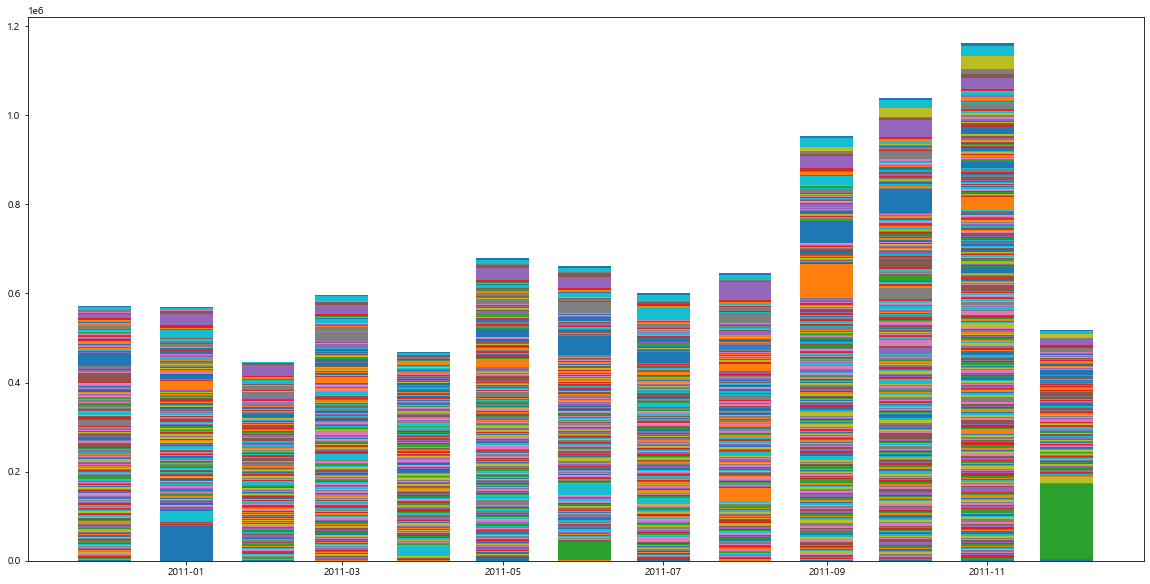

In [75]:
fig, ax = plt.subplots(figsize=(20,10))
width=20
ax.bar(df_user3.columns, df_user3.iloc[0,:],width=width,label='1번 구매자')
for i in range(1,461) :
    ax.bar(df_user3.columns, df_user3.iloc[i,:],width=width, bottom=df_user3.iloc[0:i,:].sum(axis=0))

plt.show()